In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2 as cv


In [28]:
class Object(object):
    def __init__(self, coordinates: np.array):
        self.coordinates = coordinates

    def print_object(self, coordinates: np.array, title: str) -> None:
        x = coordinates[:, 0]
        y = coordinates[:, 1]
        plt.figure(figsize=(6, 6))
        plt.plot(x, y, marker='o')
        plt.fill(x, y, alpha=0.3, color='orange')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid(True)
        plt.title(title)
        plt.show()

    def rotate(self, angle: float):
        angle = np.radians(angle)
        rotation = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        new_coordinates = self.coordinates @ rotation
        self.print_object(new_coordinates, 'rotation')
        return new_coordinates
    
    def scale(self, factorx: float, factory: float):
        new_coordinates = self.coordinates * [factorx, factory]
        self.print_object(new_coordinates, "scaling")
        return new_coordinates
        
    def reflection(self, axis:str):
        matrix = np.eye(2)
        if axis == 'x':
            matrix[1][1] = -1
        elif axis == 'y':
            matrix[0][0] = -1
        elif axis == '0':
            matrix = matrix * -1
        else:
            raise ValueError("incorrect axis")
        new_coordinates = self.coordinates @ matrix
        self.print_object(new_coordinates, "reflection")
        return new_coordinates
    
    def shear(self, axis:str, angle:float):
        angle = np.radians(angle)
        matrix = np.eye(2)
        if axis == 'y':
            matrix[0][1] = np.tan(angle)
        elif axis == 'x':
            matrix[1][0] = np.tan(angle)
        else:
            raise ValueError("incorrect axis")
        new_coordinates = self.coordinates @ matrix
        self.print_object(new_coordinates, "shear")
        return new_coordinates
    
    def custom_transform(self, matrix):
        matrix = np.array(matrix)
        print(matrix.shape)
        print(type(matrix.shape))
        if matrix.shape == (2,2):
            new_coordinates = self.coordinates @ matrix
            self.print_object(new_coordinates, "custom_transform")
            return new_coordinates
        else:
            print("invalid matrix")
            return -1
        
    def __str__(self):
        self.print_object(self.coordinates, 'origin matrix')
        return " "

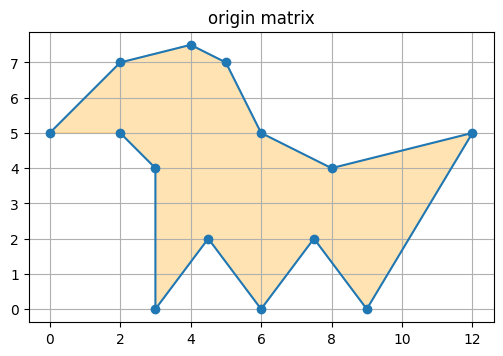

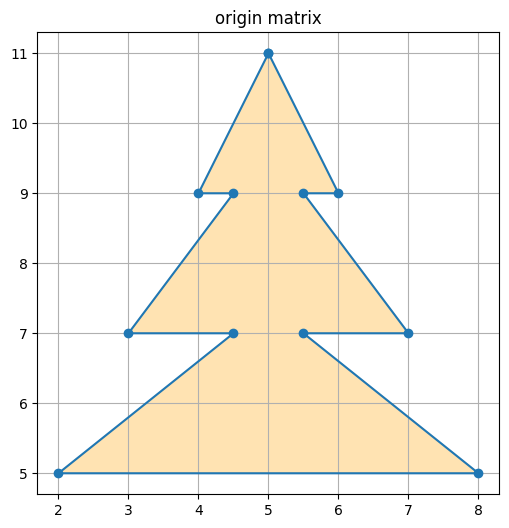

In [29]:

points = np.array([[0,5], [2,7],[4,7.5],[5,7],[6,5],[8,4],[12,5],[9,0],[7.5,2],[6,0],[4.5, 2],[3,0],[3,4], [2,5]])
dino = Object(points)
print(dino)
tree_points = np.array([
    (5, 11), (4, 9), (4.5,9), (3, 7),  (4.5,7), (2, 5), (8, 5), (5.5, 7), (7, 7) ,(5.5, 9), (6,9), (5,11) ])
tree = Object(tree_points)
print(tree)


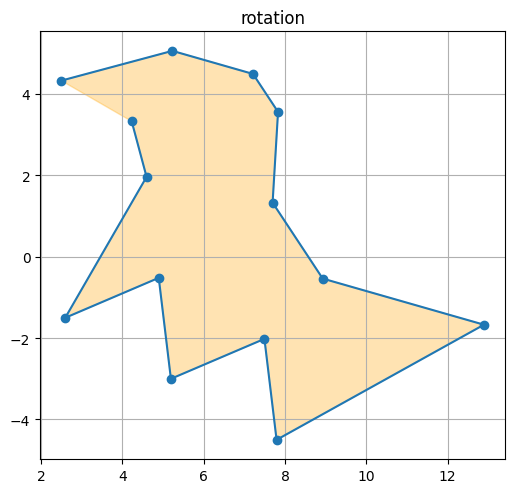

[[ 2.5         4.33012702]
 [ 5.23205081  5.06217783]
 [ 7.21410162  4.49519053]
 [ 7.83012702  3.56217783]
 [ 7.69615242  1.33012702]
 [ 8.92820323 -0.53589838]
 [12.89230485 -1.66987298]
 [ 7.79422863 -4.5       ]
 [ 7.49519053 -2.01794919]
 [ 5.19615242 -3.        ]
 [ 4.89711432 -0.51794919]
 [ 2.59807621 -1.5       ]
 [ 4.59807621  1.96410162]
 [ 4.23205081  3.33012702]]


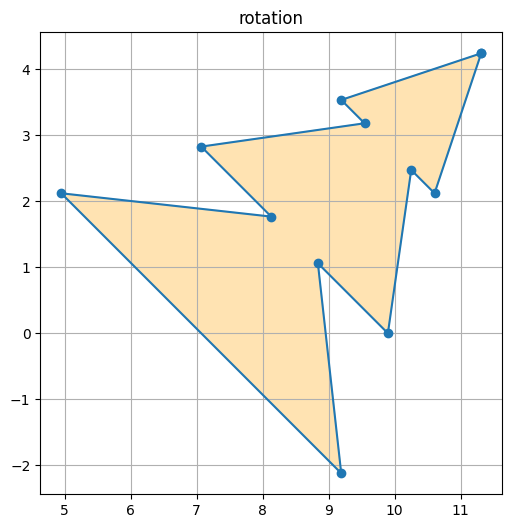

[[ 1.13137085e+01  4.24264069e+00]
 [ 9.19238816e+00  3.53553391e+00]
 [ 9.54594155e+00  3.18198052e+00]
 [ 7.07106781e+00  2.82842712e+00]
 [ 8.13172798e+00  1.76776695e+00]
 [ 4.94974747e+00  2.12132034e+00]
 [ 9.19238816e+00 -2.12132034e+00]
 [ 8.83883476e+00  1.06066017e+00]
 [ 9.89949494e+00  3.33066907e-16]
 [ 1.02530483e+01  2.47487373e+00]
 [ 1.06066017e+01  2.12132034e+00]
 [ 1.13137085e+01  4.24264069e+00]]


In [30]:
#rotation
print(dino.rotate(30))
print(tree.rotate(45))

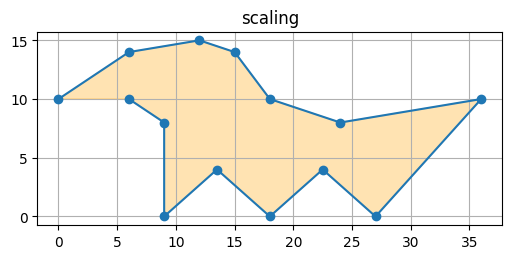

[[ 0.  10. ]
 [ 6.  14. ]
 [12.  15. ]
 [15.  14. ]
 [18.  10. ]
 [24.   8. ]
 [36.  10. ]
 [27.   0. ]
 [22.5  4. ]
 [18.   0. ]
 [13.5  4. ]
 [ 9.   0. ]
 [ 9.   8. ]
 [ 6.  10. ]]


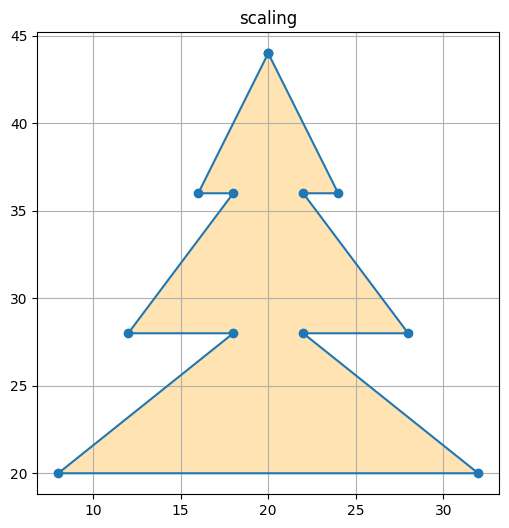

[[20. 44.]
 [16. 36.]
 [18. 36.]
 [12. 28.]
 [18. 28.]
 [ 8. 20.]
 [32. 20.]
 [22. 28.]
 [28. 28.]
 [22. 36.]
 [24. 36.]
 [20. 44.]]


In [31]:
# scaling 
print(dino.scale(3, 2))
print(tree.scale(4, 4))


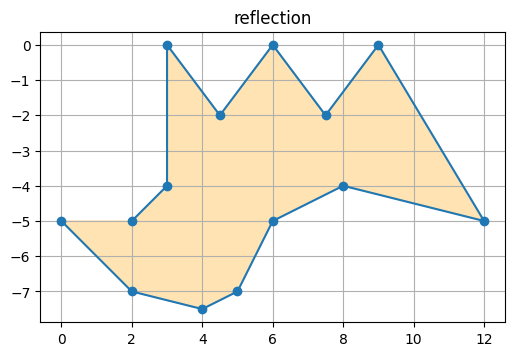

[[ 0.  -5. ]
 [ 2.  -7. ]
 [ 4.  -7.5]
 [ 5.  -7. ]
 [ 6.  -5. ]
 [ 8.  -4. ]
 [12.  -5. ]
 [ 9.   0. ]
 [ 7.5 -2. ]
 [ 6.   0. ]
 [ 4.5 -2. ]
 [ 3.   0. ]
 [ 3.  -4. ]
 [ 2.  -5. ]]


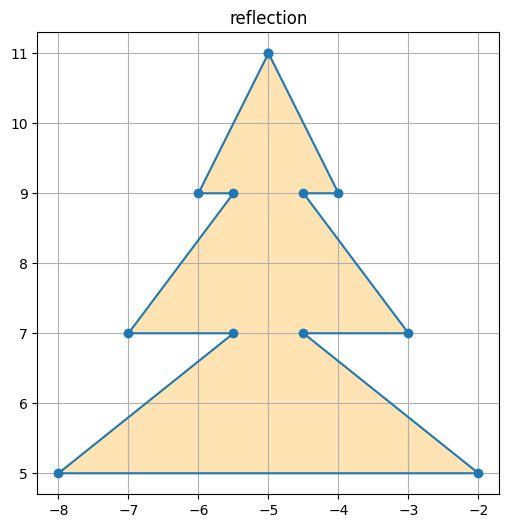

[[-5.  11. ]
 [-4.   9. ]
 [-4.5  9. ]
 [-3.   7. ]
 [-4.5  7. ]
 [-2.   5. ]
 [-8.   5. ]
 [-5.5  7. ]
 [-7.   7. ]
 [-5.5  9. ]
 [-6.   9. ]
 [-5.  11. ]]


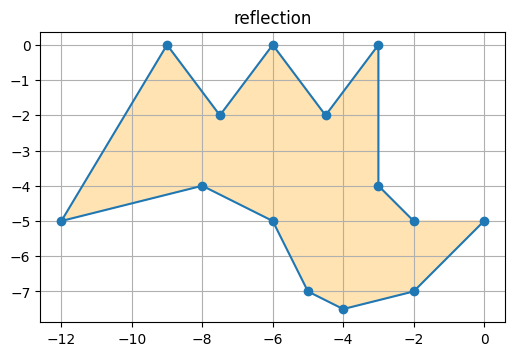

[[  0.   -5. ]
 [ -2.   -7. ]
 [ -4.   -7.5]
 [ -5.   -7. ]
 [ -6.   -5. ]
 [ -8.   -4. ]
 [-12.   -5. ]
 [ -9.    0. ]
 [ -7.5  -2. ]
 [ -6.    0. ]
 [ -4.5  -2. ]
 [ -3.    0. ]
 [ -3.   -4. ]
 [ -2.   -5. ]]


In [32]:
# reflection
print(dino.reflection("x"))
print(tree.reflection("y"))
print(dino.reflection("0"))


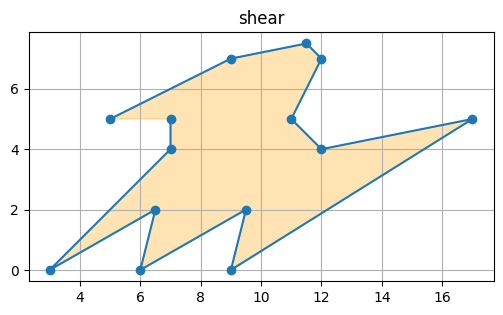

[[ 5.   5. ]
 [ 9.   7. ]
 [11.5  7.5]
 [12.   7. ]
 [11.   5. ]
 [12.   4. ]
 [17.   5. ]
 [ 9.   0. ]
 [ 9.5  2. ]
 [ 6.   0. ]
 [ 6.5  2. ]
 [ 3.   0. ]
 [ 7.   4. ]
 [ 7.   5. ]]


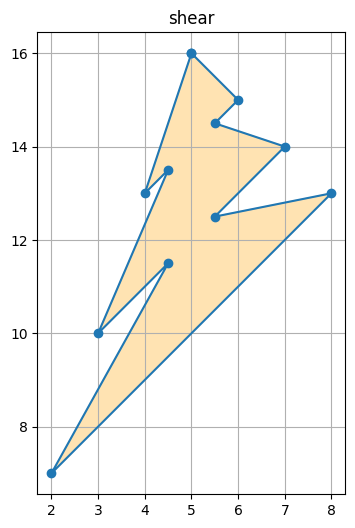

[[ 5.  16. ]
 [ 4.  13. ]
 [ 4.5 13.5]
 [ 3.  10. ]
 [ 4.5 11.5]
 [ 2.   7. ]
 [ 8.  13. ]
 [ 5.5 12.5]
 [ 7.  14. ]
 [ 5.5 14.5]
 [ 6.  15. ]
 [ 5.  16. ]]


In [33]:
#shearing
print(dino.shear("x", 45))
print(tree.shear("y", 45))

(2, 2)
<class 'tuple'>


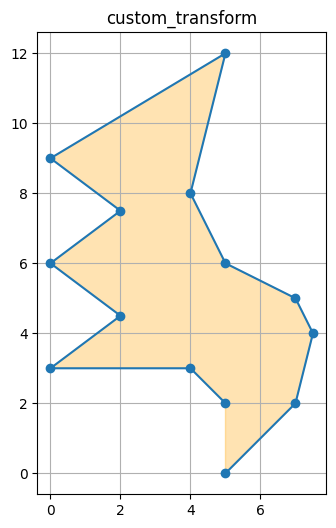

[[ 5.   0. ]
 [ 7.   2. ]
 [ 7.5  4. ]
 [ 7.   5. ]
 [ 5.   6. ]
 [ 4.   8. ]
 [ 5.  12. ]
 [ 0.   9. ]
 [ 2.   7.5]
 [ 0.   6. ]
 [ 2.   4.5]
 [ 0.   3. ]
 [ 4.   3. ]
 [ 5.   2. ]]
(2, 2)
<class 'tuple'>


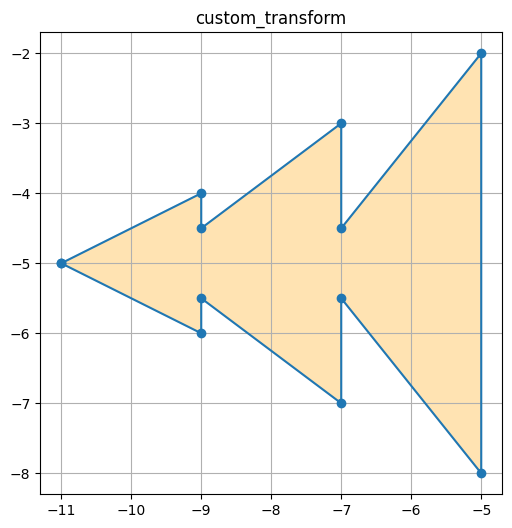

[[-11.   -5. ]
 [ -9.   -4. ]
 [ -9.   -4.5]
 [ -7.   -3. ]
 [ -7.   -4.5]
 [ -5.   -2. ]
 [ -5.   -8. ]
 [ -7.   -5.5]
 [ -7.   -7. ]
 [ -9.   -5.5]
 [ -9.   -6. ]
 [-11.   -5. ]]


In [34]:
# custom transformation
print(dino.custom_transform([[0,1],[1,0]]))
print(tree.custom_transform([[0,-1],[-1,0]]))

# Order of transformation

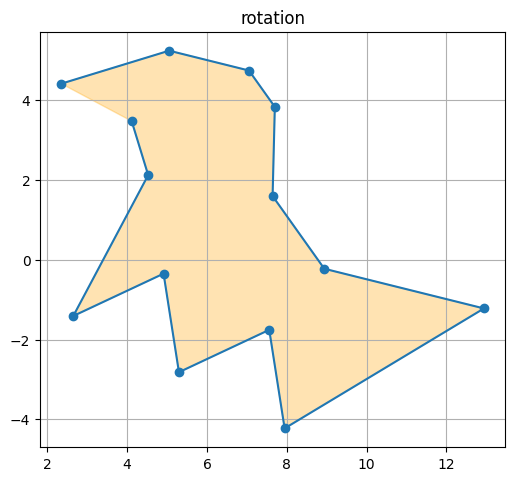

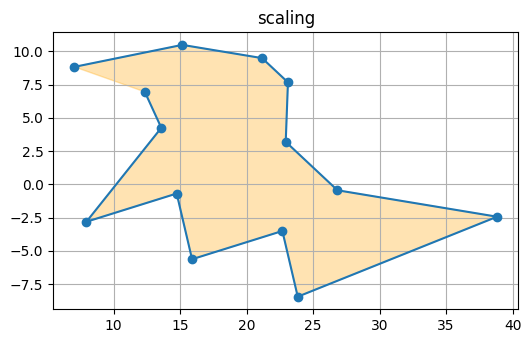

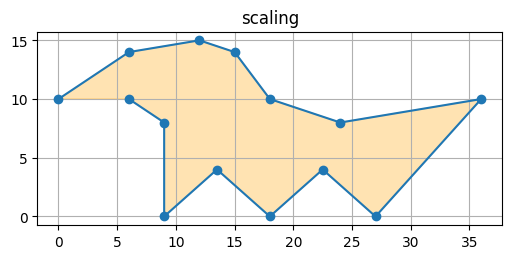

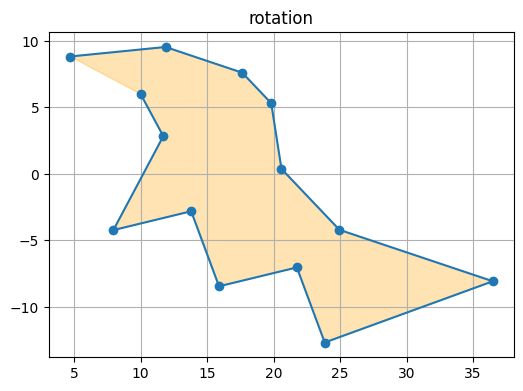

array([[  4.69471563,   8.82947593],
       [ 11.87028744,   9.54443692],
       [ 17.63744456,   7.61055514],
       [ 19.81681577,   5.31919286],
       [ 20.5877723 ,   0.3789878 ],
       [ 24.94651473,  -4.20373676],
       [ 36.48082897,  -8.07150033],
       [ 23.83958501, -12.6757322 ],
       [ 21.74420709,  -7.03131979],
       [ 15.89305667,  -8.45048813],
       [ 13.79767875,  -2.80607573],
       [  7.94652834,  -4.22524407],
       [ 11.70230084,   2.83833668],
       [  9.99240119,   6.01264655]])

In [35]:
new_dino = Object(dino.rotate(28))
new_dino.scale(3, 2)
new_dino = Object(dino.scale(3,2))
new_dino.rotate(28)

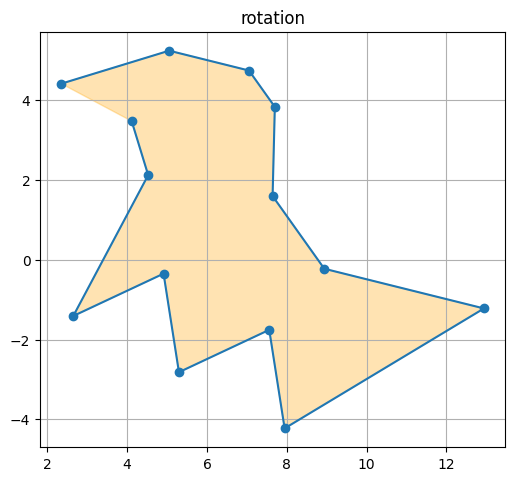

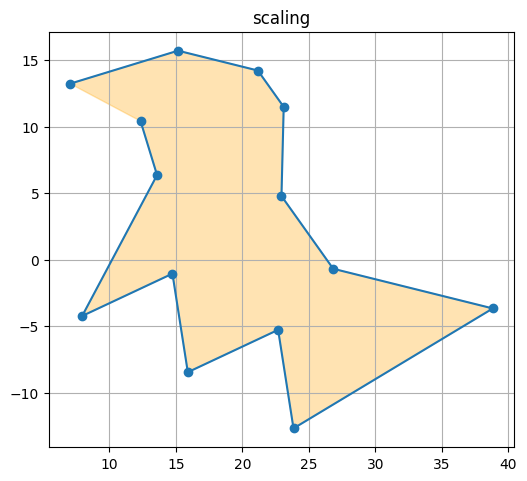

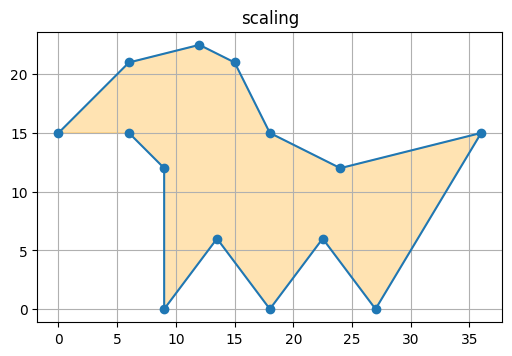

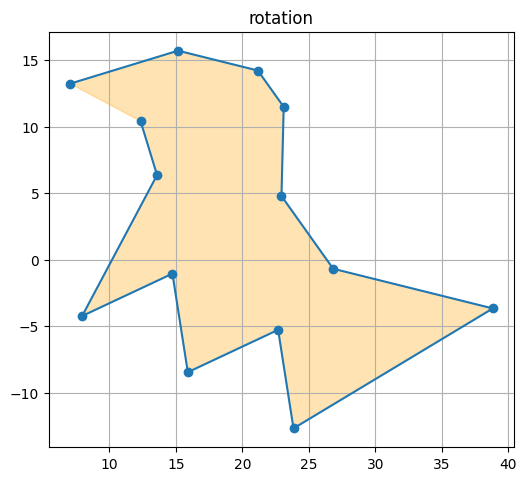

array([[  7.04207344,  13.24421389],
       [ 15.15658838,  15.72507007],
       [ 21.15848128,  14.23266209],
       [ 23.10311671,  11.49982601],
       [ 22.93513011,   4.79372576],
       [ 26.82440098,  -0.67194639],
       [ 38.82818678,  -3.65676237],
       [ 23.83958501, -12.6757322 ],
       [ 22.68315022,  -5.26542461],
       [ 15.89305667,  -8.45048813],
       [ 14.73662188,  -1.04018054],
       [  7.94652834,  -4.22524407],
       [ 13.58018709,   6.37012705],
       [ 12.339759  ,  10.42738452]])

In [36]:
new_dino = Object(dino.rotate(28))
new_dino.scale(3, 3)
new_dino = Object(dino.scale(3,3))
new_dino.rotate(28)

If scaling factor is the same than order is not important. But if factor of x and y is different, than order is important